# Iris Data
-------------

In [1]:
from sklearn.datasets import load_iris
from skrules import SkopeRules

dataset = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
clf = SkopeRules(max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names=feature_names)

for idx, species in enumerate(dataset.target_names):
    X, y = dataset.data, dataset.target
    clf.fit(X, y == idx)
    rules = clf.rules_[0:3]
    print("Rules for iris", species)
    for rule in rules:
        print(rule)
    print()
    print(20*'=')
    print()

/Users/ryusukekimura/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Rules for iris setosa
('petal_length <= 2.449999988079071', (1.0, 1.0, 21))
('petal_width <= 0.800000011920929', (1.0, 1.0, 27))


Rules for iris versicolor
('petal_length <= 5.049999952316284 and petal_length > 2.449999988079071 and petal_width <= 1.75', (1.0, 0.975609756097561, 1))
('petal_length <= 4.75 and petal_width > 0.75', (1.0, 0.9024390243902439, 1))
('petal_length <= 4.75 and petal_length > 2.449999988079071', (1.0, 0.8837209302325582, 1))


Rules for iris virginica
('petal_width > 1.75', (0.9821002891436328, 0.9045403644763288, 9))
('petal_length > 4.75 and petal_width > 1.75', (0.9743589743589743, 0.8837209302325582, 1))
('petal_length > 4.950000047683716', (0.9651372019793072, 0.867109634551495, 3))




In [2]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Boston Data
-------------

In [3]:
%matplotlib inline

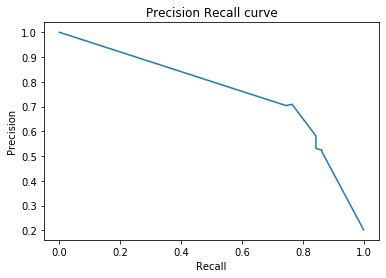

In [4]:
from sklearn.datasets import load_boston
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from skrules import SkopeRules

dataset = load_boston()
clf = SkopeRules(max_depth_duplication=None,
                 n_estimators=30,
                 precision_min=0.2,
                 recall_min=0.01,
                 feature_names=dataset.feature_names)

X, y = dataset.data, dataset.target > 25
X_train, y_train = X[:len(y)//2], y[:len(y)//2]
X_test, y_test = X[len(y)//2:], y[len(y)//2:]
clf.fit(X_train, y_train)
y_score = clf.score_top_rules(X_test) # Get a risk score for each test example
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.show()